# Data augmentation

Data augmentation in CNN is the process of creating additional training data by introducing small random variations into existing images. This helps increase the volume of data, prevent overfitting, improve the model's generalization ability, and enhance its robustness to various conditions.

## Data augmantation techniques

Dataset augmentation has been a particularly effective technique for a specific
classification problem: object recognition. Images are high dimensional and include
an enormous variety of factors of variation, many of which can be easily simulated. Operations like translating the training images a few pixels in each direction can
often greatly improve generalization [2](https://www.deeplearningbook.org/contents/convnets.html).

Image Data Augmentation is now a famous and common method used with CNNs and involves techniques such as:

+ Flips
+ Rotation (at 90 degrees and finer angles)
+ Translation
+ Scaling
+ Salt and Pepper noise addition
[4](https://nnart.org/what-is-data-augmentation-in-a-cnn/)

### Flips

By Flipping images, the optimizer will not become biased that particular features of an image are only on one side. To do this augmentation, the original training image is flipped vertically or horizontally over one axis of the image. As a result, the features continually change directions.

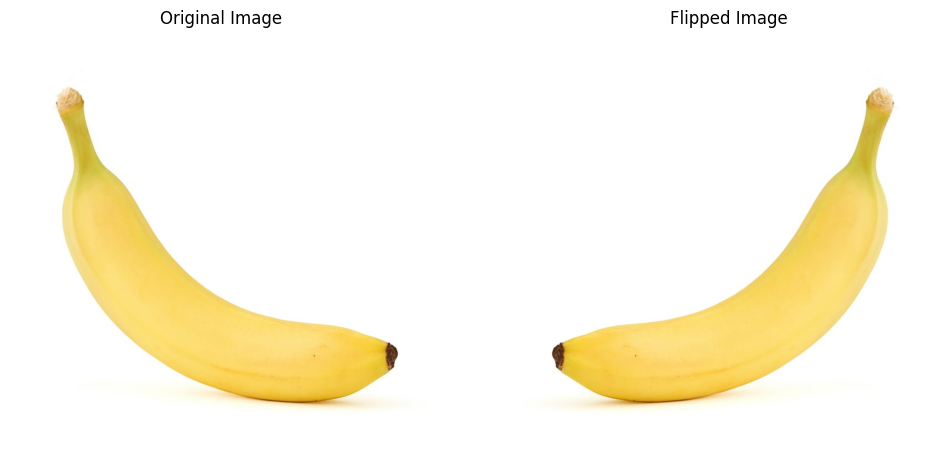

In [17]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Specify the URL to your input image
input_image_url = 'https://i5.walmartimages.com/seo/Fresh-Banana-Fruit-Each_5939a6fa-a0d6-431c-88c6-b4f21608e4be.f7cd0cc487761d74c69b7731493c1581.jpeg?odnHeight=768&odnWidth=768&odnBg=FFFFFF'

def load_image_from_url(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content))
image = load_image_from_url(input_image_url)

#Flipping
flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)

# Set the size images
plt.figure(figsize=(12, 12))

# Display the original and flipped images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flipped_image)
plt.title('Flipped Image')
plt.axis('off')

plt.show()

Flipping is a similar augmentation as rotation, however, it produces mirror images. A particular feature such as the head of a person either stays on top, on the left, on the right, or at the bottom of the image.

**Important Note** Do not use transformation that would change the correct class. For example, optical character recognition tasks require recognizing the difference between ‘b’ and ‘d’ and the difference between ‘6’ and ‘9’, so horizontal flips and 180◦ rotations are not appropriate ways of augmenting datasets for these tasks [2](https://www.deeplearningbook.org/contents/convnets.html)

### Rotation

Rotation is a common augmentation technique performed at various angles, not just 90 degrees, to generate more diverse data. To maintain consistency, the background color is typically fixed during rotation, preventing the model from perceiving background changes as distinct features. This is especially effective when the background remains constant across all rotated images.



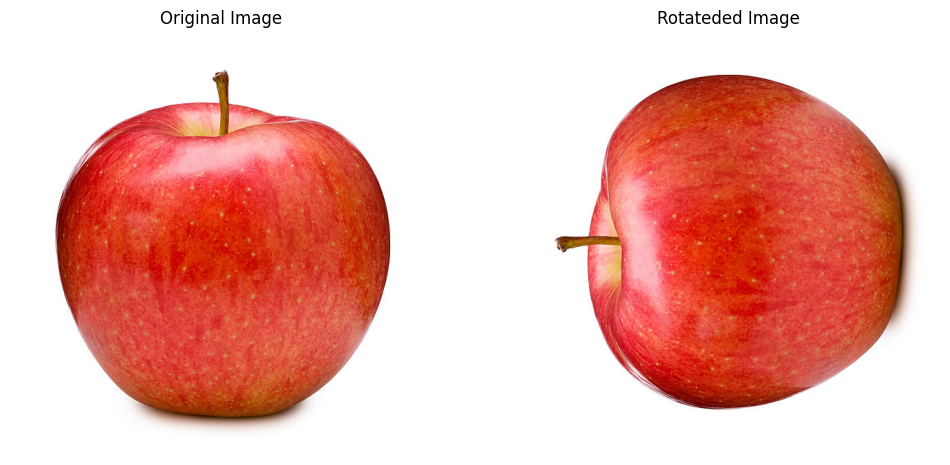

In [18]:
# Download the image from the URL
input_image_url = 'https://media.istockphoto.com/id/184276818/photo/red-apple.jpg?s=612x612&w=0&k=20&c=NvO-bLsG0DJ_7Ii8SSVoKLurzjmV0Qi4eGfn6nW3l5w='
image = load_image_from_url(input_image_url)

# Rotation
rotated_image = image.transpose(Image.ROTATE_90)

# Set the size images
plt.figure(figsize=(12, 12))

# Display the original and rotated images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title('Rotateded Image')
plt.axis('off')

plt.show()

### Translation

Translation of an image means shifting the main object in the image in various directions. For example, consider a person in the center with all their parts visible in the frame and take it as a base image. Next, shift the person to one corner with the legs cut from the bottom as one translated image.

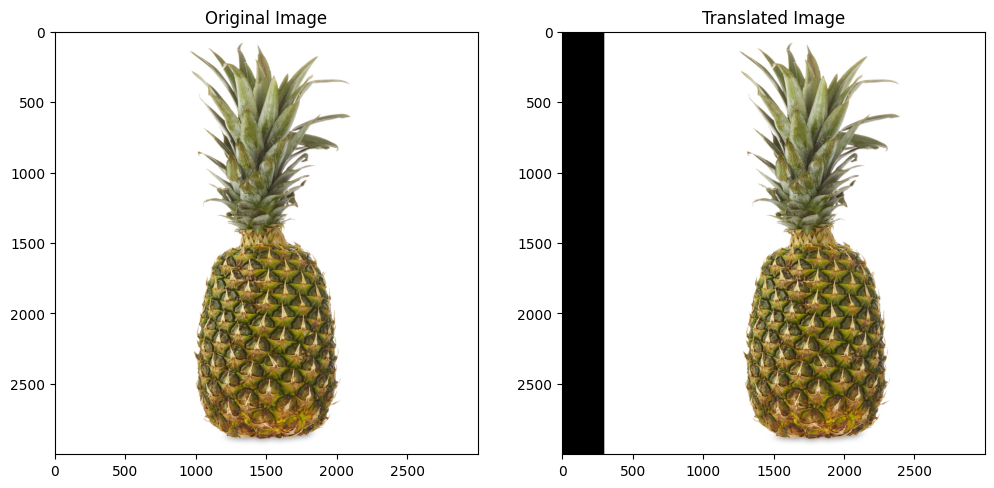

In [19]:
# Download the image from the URL
input_image_url = 'https://i5.walmartimages.com/seo/Fresh-Pineapple-Each_1d2b3723-b31f-481d-ae30-c82fcbb59e20.d2e4de8d8b987f98a6e9da93a7e8c752.jpeg'
image = load_image_from_url(input_image_url)

def translation(image, translation_x, translation_y):
    translated_image = Image.new('RGB', image.size)
    translated_image.paste(image, (translation_x, translation_y))
    return translated_image

# Translation
translated_image = translation(image,300,0)

# Set the size images
plt.figure(figsize=(12, 12))

# Display the original and translated images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(translated_image)
plt.title('Translated Image')

plt.show()

### Scaling

Scaling provides more diversity in the training data of a machine learning model. Scaling the image will ensure that the object is recognized by the network regardless of how zoomed in or out the image is. Sometimes the object is tiny in the center. Sometimes, the object is zoomed in the image and even cropped at some parts.

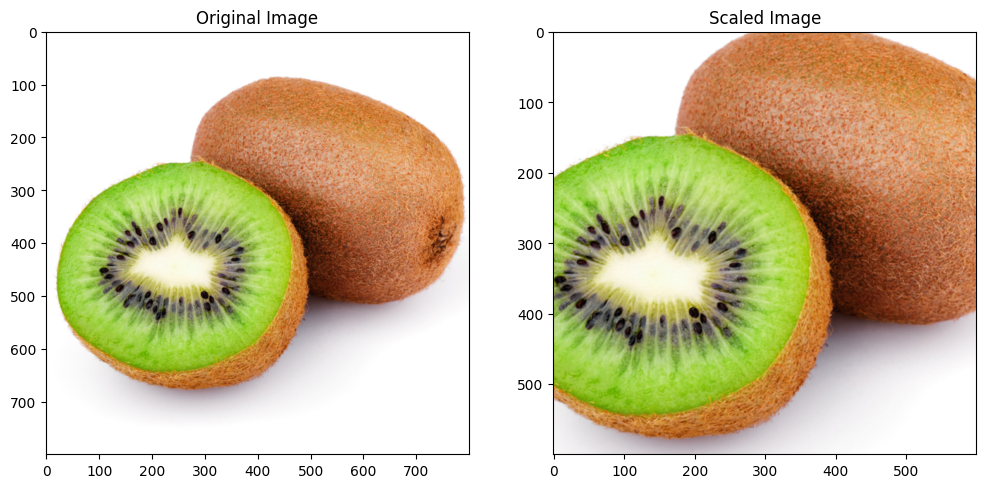

In [20]:
# Download the image from the URL
input_image_url = 'https://freshsensations.com.au/cdn/shop/products/KiwiFruit.png?v=1643769428'
image = load_image_from_url(input_image_url)

# Set the size images
plt.figure(figsize=(12, 12))

# Display the original and scaled images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)

# Scaling (crop the center part)
plt.imshow(image.crop((100,100,image.width - 100, image.height - 100)))
plt.title('Scaled Image')

plt.show()


### Salt and Pepper Noise Addition

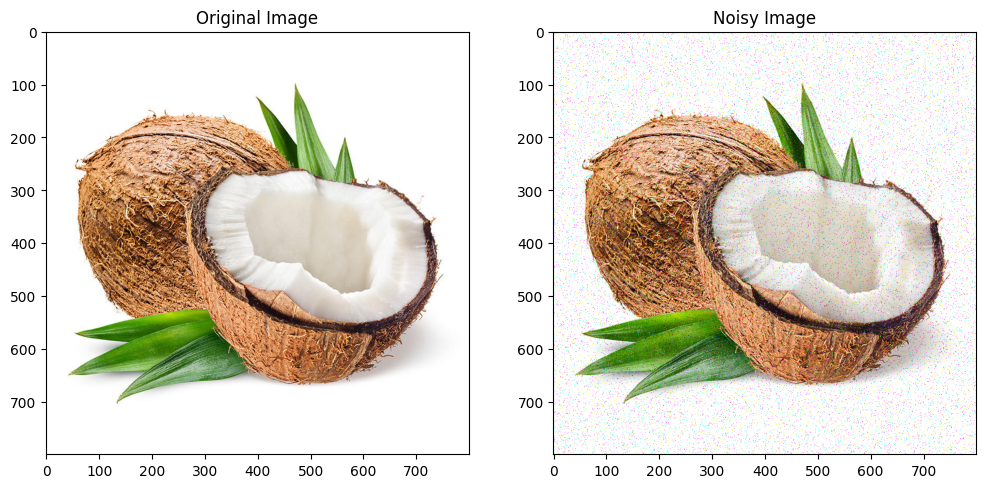

In [21]:
import numpy as np

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    """
    Add salt-and-pepper noise to an image.

    Parameters:
    - image: PIL Image object
    - salt_prob: Probability of adding salt noise
    - pepper_prob: Probability of adding pepper noise

    Returns:
    - Image object with salt-and-pepper noise
    """
    img_array = np.array(image)
    salt_mask = np.random.rand(*img_array.shape) < salt_prob
    pepper_mask = np.random.rand(*img_array.shape) < pepper_prob

    img_array[salt_mask] = 255  # White pixels (salt)
    img_array[pepper_mask] = 0   # Black pixels (pepper)

    return Image.fromarray(img_array)


# Download the image from the URL
input_image_url = 'https://magnumopt.kz/upload/iblock/85f/85f3bc2a2eda0c7168df81b30e273242.png'
image = load_image_from_url(input_image_url)

# Set the probabilities for salt and pepper noise
salt_probability = 0.02  # Adjust as needed
pepper_probability = 0.02  # Adjust as needed

# Add salt-and-pepper noise to the image
noisy_image = add_salt_and_pepper_noise(image, salt_probability, pepper_probability)

# Display the original and noisy images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')

plt.show()


## Data Augmentation Applications

Data augmentation can apply to all machine learning applications where acquiring quality data is challenging. Furthermore, it can help improve model robustness and performance across all fields of study [6](https://www.datacamp.com/tutorial/complete-guide-data-augmentation). There are some application examples.

### Helthcare

Acquiring and labeling medical imaging datasets is time-consuming and expensive. You also need a subject matter expert to validate the dataset before performing data analysis. Using geometric and other transformations can help you train robust and accurate machine-learning models.

In pneumonia classification, various augmentation techniques can be employed to enhance model performance. However, caution should be exercised with certain augmentations, such as random rotation and reflection along the x-axis, as they may yield opposite results when dealing with X-ray images.

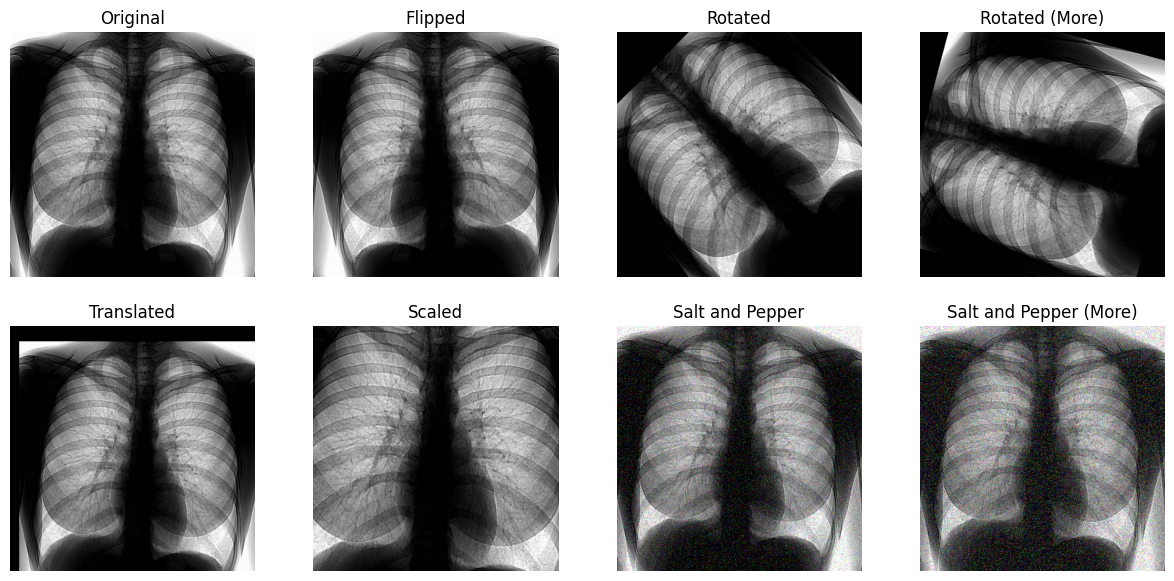

In [22]:
def plot_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(2, 4, i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Specify the URL to your input image
input_image_url = 'https://lada-med.ru/assets/mgr/images/articles/fluoro1.jpg'

# Download the image from the URL
original_image = load_image_from_url(input_image_url)

# Image augmentations
flipped_image = original_image.transpose(Image.FLIP_LEFT_RIGHT)
rotated_image = original_image.rotate(45)
rotated_more_image = original_image.rotate(75)

# Translation
translated_image = translation(original_image,30,50)

# Scaling (crop the center part)
scaled_image = original_image.crop((100, 100, original_image.width - 100, original_image.height - 100))

# Salt and Pepper noise
salt_and_pepper_image1 = add_salt_and_pepper_noise(original_image, salt_prob=0.05, pepper_prob=0.05)

# Salt and Pepper noise (even more)
salt_and_pepper_image2 = add_salt_and_pepper_noise(original_image, salt_prob=0.1, pepper_prob=0.1)

# Display the images
images = [original_image, flipped_image, rotated_image, rotated_more_image, translated_image, scaled_image, salt_and_pepper_image1, salt_and_pepper_image2]
titles = ['Original', 'Flipped', 'Rotated', 'Rotated (More)', 'Translated', 'Scaled', 'Salt and Pepper', 'Salt and Pepper (More)']

plot_images(images, titles)

#### Self-Driving Cars

There is limited data available on self-driving cars, and companies are using simulated environments to generate synthetic data using reinforcement learning. It can help you train and test machine learning applications where data security is an issue. 


<img src="https://images.datacamp.com/image/upload/v1669207732/Autonomous_Visualization_System_from_Uber_ATG_9e79d6c630.png" alt="Self Driven Car">


The possibilities of augmented data as a simulation are endless, as it can be used to generate real-world scenarios. 

#### Natural Language Processing

Text data augmentation is generally used in situations with limited quality data, and improving the performance metric takes priority. You can apply synonym augmentation, word embedding, character swap, and random insertion and deletion. These techniques are also valuable for low-resource languages. 

<img src = "https://images.datacamp.com/image/upload/v1669207732/Selective_Text_Augmentation_with_Word_Roles_for_Low_Resource_Text_Classification_c1302878c9.png" alt = "Natural Language Processing">

Researchers use text augmentation for the language models in high error recognition scenarios, sequence-to-sequence data generation, and text classification. 

### Automatic Speech Recognation

In sound classification and speech recognition, data augmentation works wonders. It improves the model performance even on low-resource languages. 

<img src = "https://images.datacamp.com/image/upload/v1669207728/Noise_Injection_b3af64a578.png" alt = "Automatic Speech Recognation">

The random noise injection, shifting, and changing the pitch can help you produce state-of-the-art speech-to-text models. You can also use GANs to generate realistic sounds for a particular application.

## References

1. https://d2l.ai/chapter_computer-vision/image-augmentation.html#image-augmentation

2. https://www.deeplearningbook.org/contents/regularization.html

3. https://www.deeplearningbook.org/contents/convnets.html

4. https://nnart.org/what-is-data-augmentation-in-a-cnn/

5. https://github.com/jeffprosise/Deep-Learning/blob/master/Data%20Augmentation.ipynb

6. https://www.datacamp.com/tutorial/complete-guide-data-augmentation